<a href="https://colab.research.google.com/github/shivani-nandani/rumor-spread/blob/main/SIHR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import mpld3
mpld3.enable_notebook()

In [12]:
def deriv(y, t,lamb,beta,delta,epsilon,eta,alpha,k):
    S, I,H,R = y
    dIdt=-(lamb+beta)*k*I*S
    dSdt=(lamb*k*I*S)-((alpha*k*S)*(S+H+R))-(delta*S)+(epsilon*H)+(eta*k*H*S)
    dHdt=(delta*S)-(epsilon*H)-(eta*k*H*S)
    dRdt=(beta*k*I*S)+((alpha*k*S)*(S+H+R))
    return [dSdt,dIdt,dHdt,dRdt]

In [13]:
 #general trends of the four kinds of agents in the SIHR rumor spreading model 
    
lamb=0.8
beta = 0.2
delta = 0.6
epsilon = 0.5
eta = 0.5
alpha=0.3
k=10

N=1000000

S0, I0,H0, R0 = 1/N, (N - 1)/N, 0 ,0 # initial conditions: one infected, rest susceptible

In [14]:
t = np.linspace(0, 8, 1000) # Grid of time points (in days)
y0 = S0, I0,H0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(lamb,beta,delta,epsilon,eta,alpha,k))
S, I, H,R= ret.T

In [15]:
def plotsir(t, S, I,H, R):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b',  linewidth=2, label='Spreader',linestyle = '-')
    ax.plot(t, I, 'y',  linewidth=2, label='Ignorant',linestyle = '-')
    ax.plot(t, H, 'g',  linewidth=2, label='Hibernator',linestyle = '-')
    ax.plot(t, R, 'r',linewidth=2, label='Stifler',linestyle = '-')
    
    ax.set_xlabel('Time ')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
        
    plt.show();

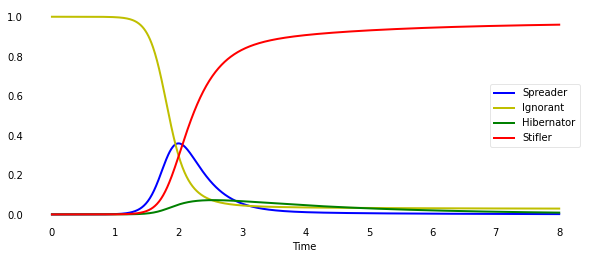

In [16]:
plotsir(t, S, I,H, R) #general trends of the four kinds of agents in the SIHR rumor spreading model

### densities of spreaders change over time for different refusing rate(beta).

In [17]:
lamb=0.8
beta = 0
delta = 0.5
epsilon = 0.5
eta = 0.5
alpha=0.5
k=10

N=1000000

S0, I0,H0, R0 = 1/N, (N - 1)/N, 0 ,0 # initial conditions: one infected, rest susceptible

In [18]:
t = np.linspace(0, 5, 1000) # Grid of time points (in days)
y0 = S0, I0,H0, R0 # Initial conditions vector

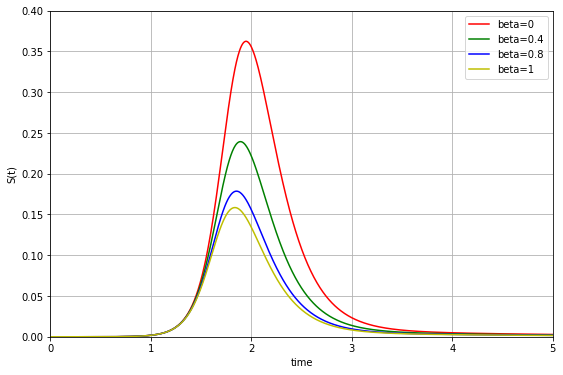

In [19]:
beta_arr = [0,0.4,0.8,1]  

R_table = []
for beta in beta_arr:
    ret = odeint(deriv, y0, t, args=(lamb,beta,delta,epsilon,eta,alpha,k))
    S, I, H,R= ret.T
    R_table.append(S)
    

plt.figure(figsize = [9,6])
plt.plot(t, R_table[0], c = 'r', linestyle = '-', label = 'beta=0')
plt.plot(t, R_table[1], c = 'g', linestyle = '-', label = 'beta=0.4')
plt.plot(t, R_table[2], c = 'b', linestyle = '-', label = 'beta=0.8')
plt.plot(t, R_table[3], c = 'y', linestyle = '-', label = 'beta=1')
plt.ylabel('S(t)')
plt.xlabel('time')
plt.legend(loc = 'upper right')
plt.xlim(0, 5)
plt.ylim(0,.40)
plt.grid()
plt.show()

### densities of spreaders change over time for different forgetting rate δ, the spontaneous remembering rate ξ , and the wakened remembering rate η.

In [20]:
lamb=0.8
beta = 0.2
alpha=0.5

delta = 0
epsilon = 0
eta = 0

k=10

N=1000000

S0, I0,H0, R0 = 1/N, (N - 1)/N, 0 ,0 # initial conditions: one infected, rest susceptible

In [21]:
t = np.linspace(0, 5, 1000) # Grid of time points (in days)
y0 = S0, I0,H0, R0 # Initial conditions vector

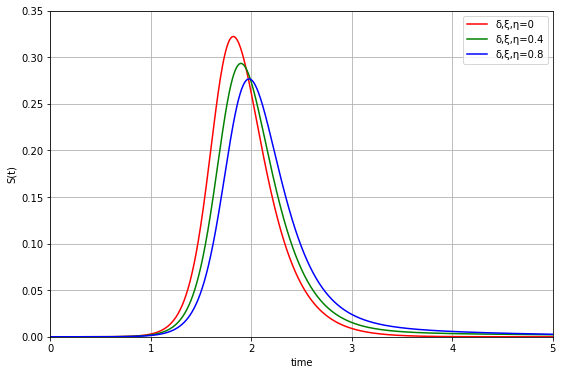

In [22]:
x_arr = [0,0.4,0.8]  


S_table = []
for delta in x_arr:
    ret = odeint(deriv, y0, t, args=(lamb,beta,delta,delta,delta,alpha,k))
    S, I, H,R= ret.T
    S_table.append(S)
    
    

plt.figure(figsize = [9,6])
plt.plot(t, S_table[0], c = 'r', linestyle = '-', label = 'δ,ξ,η=0')
plt.plot(t, S_table[1], c = 'g', linestyle = '-', label = 'δ,ξ,η=0.4')
plt.plot(t, S_table[2], c = 'b', linestyle = '-', label = 'δ,ξ,η=0.8')

plt.ylabel('S(t)')
plt.xlabel('time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.ylim(0,.35)
plt.grid()
plt.show()

### Density of hibernators change with the spontaneous remembering rate ξ over time.

In [23]:
lamb=0.8
beta = 0.2
alpha=0.5
delta = 0.5
eta = 0.5

epsilon = 0


k=10

N=1000000

S0, I0,H0, R0 = 1/N, (N - 1)/N, 0 ,0 # initial conditions: one infected, rest susceptible

In [24]:
t = np.linspace(0, 18, 1000) # Grid of time points (in days)
y0 = S0, I0,H0, R0 # Initial conditions vector

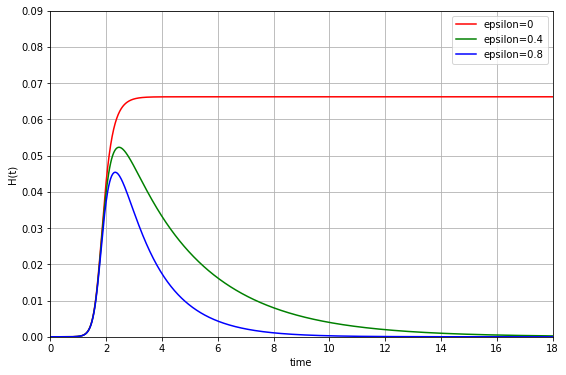

In [25]:
epsilon_arr = [0,0.4,0.8]  

R_table=[]
H_table = []
for epsilon in epsilon_arr:
    ret = odeint(deriv, y0, t, args=(lamb,beta,delta,epsilon,eta,alpha,k))
    S, I, H,R= ret.T
    H_table.append(H)
    R_table.append(R)
    


plt.figure(figsize = [9,6])
plt.plot(t, H_table[0], c = 'r', linestyle = '-', label = 'epsilon=0')
plt.plot(t, H_table[1], c = 'g', linestyle = '-', label = 'epsilon=0.4')
plt.plot(t, H_table[2], c = 'b', linestyle = '-', label = 'epsilon=0.8')

plt.ylabel('H(t)')
plt.xlabel('time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.ylim(0,0.09)
plt.grid()
plt.show()

### Density of stiflers change with the spontaneous remembering rate ξ over time.

In [26]:
lamb=0.8
beta = 0.2
alpha=0.5
delta = 0.5
eta = 0.5

epsilon = 0


k=10

N=1000000

S0, I0,H0, R0 = 1/N, (N - 1)/N, 0 ,0 # initial conditions: one infected, rest susceptible

In [28]:
t = np.linspace(0, 15,1000) # Grid of time points (in days)
y0 = S0, I0,H0, R0 # Initial conditions vector

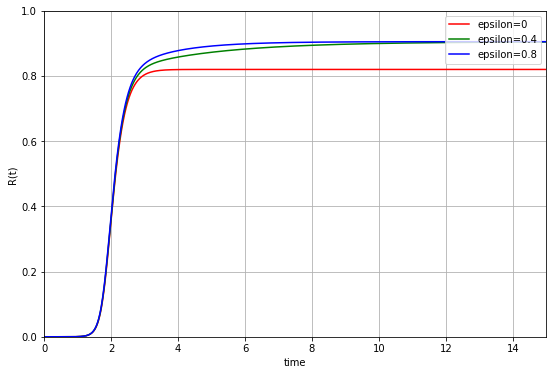

In [29]:
epsilon_arr = [0,0.4,0.8]  

M_table=[]

for epsilon in epsilon_arr:
    ret = odeint(deriv, y0, t, args=(lamb,beta,delta,epsilon,eta,alpha,k))
    S, I, H,R= ret.T
    M_table.append(R)
    


plt.figure(figsize = [9,6])
plt.plot(t, M_table[0], c = 'r', linestyle = '-', label = 'epsilon=0')
plt.plot(t, M_table[1], c = 'g', linestyle = '-', label = 'epsilon=0.4')
plt.plot(t, M_table[2], c = 'b', linestyle = '-', label = 'epsilon=0.8')

plt.ylabel('R(t)')
plt.xlabel('time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.ylim(0,1)
plt.grid()
plt.show()